In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-segmentation/bank_transactions.csv
/kaggle/input/data-frozenlava/label_encoder.pkl
/kaggle/input/data-frozenlava/Cluster0data.csv
/kaggle/input/data-frozenlava/Cluster2data.csv
/kaggle/input/data-frozenlava/Transaction_details (2).csv
/kaggle/input/data-frozenlava/Customers_data (3).csv
/kaggle/input/data-frozenlava/Cluster1data.csv
/kaggle/input/data-frozenlava/Cluster3data.csv
/kaggle/input/data-frozenlava/knn_model.joblib
/kaggle/input/data-frozenlava/Customer_cluster.csv
/kaggle/input/data-frozenlava/standard_scaler.pkl


In [2]:
df_raw = pd.read_csv("/kaggle/input/bank-customer-segmentation/bank_transactions.csv")

# Customer Data before pre-proceesing : 

In [3]:
df_raw.CustGender.value_counts()

CustGender
M    765530
F    281936
T         1
Name: count, dtype: int64

In [4]:
df_raw.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

# Customer Data After pre-proceesing

In [5]:
cust_df = pd.read_csv("/kaggle/input/data-frozenlava/Customers_data (3).csv")
cust_df.head()

,Unnamed: 0,ID,Age,Gender,Average bank balance,Average unix time of transaction
0,0,C5841053,22,F,17819.05,143207.0
1,1,C2142763,59,M,2270.69,141858.0
2,2,C4417068,20,F,17874.44,142712.0
3,4,C9031234,28,F,6714.43,181156.0
4,5,C1536588,44,F,53609.20,173940.0


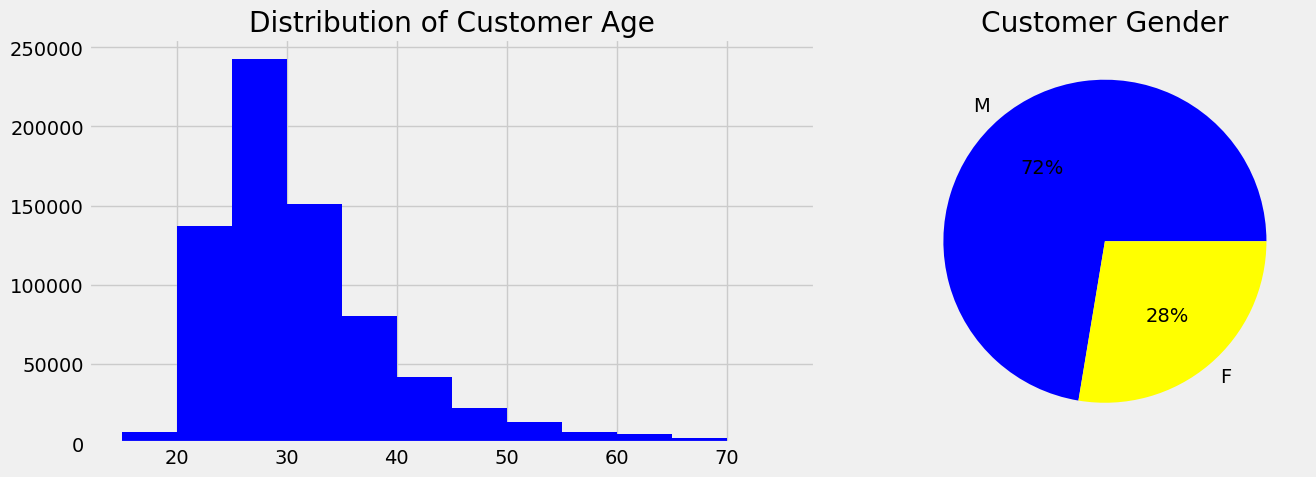

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))

# Adjust the bins to provide a clearer view of the distribution
bins = range(15, 80, 5)
ax[0].hist(x=cust_df['Age'], color='blue', bins=bins)  
ax[0].set_title("Distribution of Customer Age")

# Set the colors to blue and yellow for the pie chart
palette_color = ['blue', 'yellow']
ax[1].pie(cust_df['Gender'].value_counts(), autopct='%1.f%%', colors=palette_color, labels=['M', 'F'])
ax[1].set_title("Customer Gender")

plt.tight_layout()
plt.show()


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.naive_bayes import ComplementNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from scipy import stats
from sklearn.base import clone 

# Details About the transaction :

In [8]:
df = pd.read_csv("/kaggle/input/data-frozenlava/Transaction_details (2).csv")

In [9]:
df.profile_report()

AttributeError: 'DataFrame' object has no attribute 'profile_report'

In [ ]:
df.info()

In [ ]:
df.nunique()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe(include='all').T